Dataset Loaded Successfully!
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

/tmp/ipython-input-2113033556.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)



--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.50      0.55       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1300
           1       0.61      0.48      0.54       458

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.78      1758



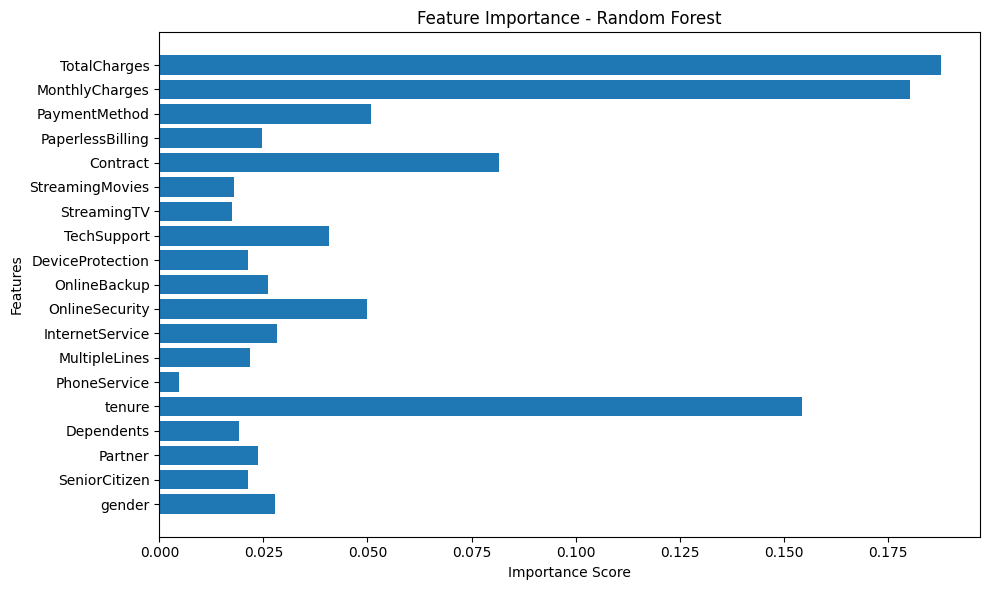

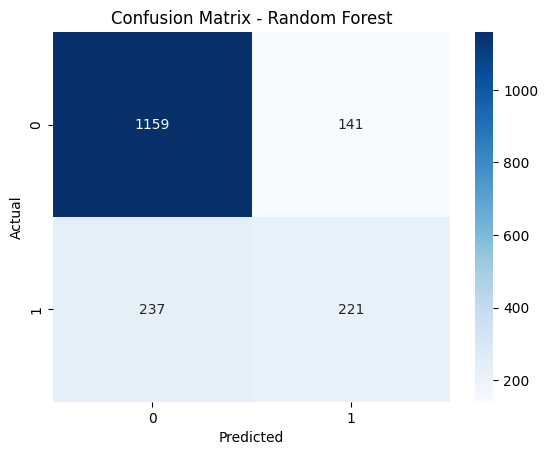


Project Completed Successfully!


In [2]:
# ---------------------------------------------
# CUSTOMER CHURN ANALYSIS – COMPLETE PYTHON PROJECT
# ---------------------------------------------

# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# STEP 2: Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset Loaded Successfully!")
print(df.head())

# STEP 3: Data Cleaning
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Drop customerID
df.drop("customerID", axis=1, inplace=True)

# STEP 4: Encode Categorical Variables
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# STEP 5: Train-Test Split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# STEP 6: Logistic Regression Model
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_log))

# STEP 7: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf))

# STEP 8: Feature Importance Plot
importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# STEP 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nProject Completed Successfully!")


In [28]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [29]:
#Load Dataset

df = pd.read_csv("Telco-Customer-Churn.csv")

df.head()
df.info()
df.describe()
df.isnull().sum()
df['Churn'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count
Churn,
No,5174
Yes,1869


In [30]:
#Data Cleaning

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df.drop('customerID', axis=1, inplace=True)

df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

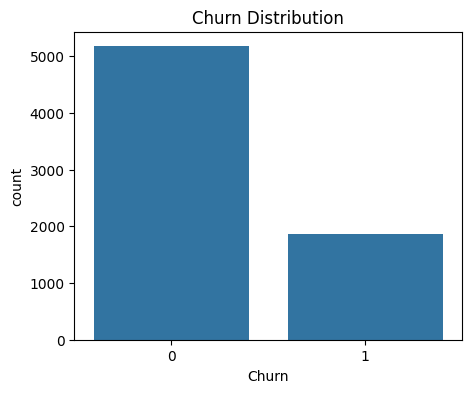

In [31]:
#Visualizations

plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


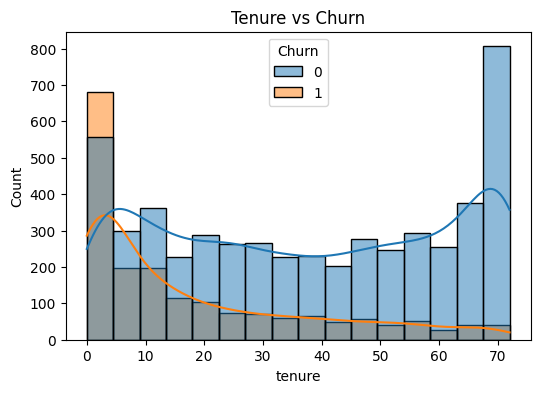

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)
plt.title("Tenure vs Churn")
plt.show()


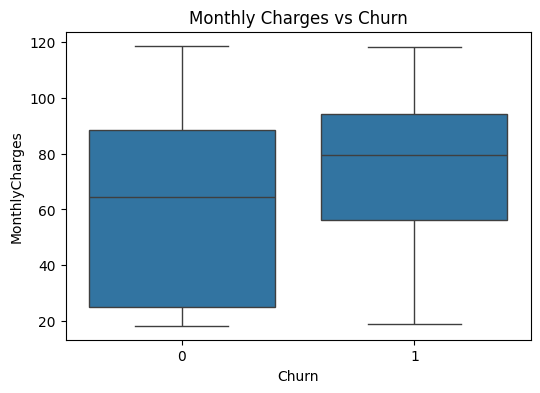

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [35]:
#Replace "No internet service" with "No"

cols = ['OnlineSecurity','OnlineBackup','DeviceProtection',
        'TechSupport','StreamingTV','StreamingMovies']

for col in cols:
    df[col] = df[col].replace({'No internet service':'No'})

In [36]:
#Create Tenure Group Feature

df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0, 12, 24, 48, 60, 100],
                            labels=['0-12','13-24','25-48','49-60','60+'])

In [37]:
#Separate Features and Target

X = df.drop("Churn", axis=1)
y = df["Churn"]


In [38]:
#Encode Categorical Columns (Simple)

# Label encode all YES/NO binary columns
le = LabelEncoder()

binary_cols = []
for col in X.columns:
    if X[col].dtype == 'object' and X[col].nunique() == 2:
        binary_cols.append(col)

for col in binary_cols:
    X[col] = le.fit_transform(X[col])

# One-hot encode multi-category columns
X = pd.get_dummies(X, drop_first=True)

In [40]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [46]:
#Train Logistic Regression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.801277501774308
ROC AUC: 0.8426619132501486
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
#Train Random Forest

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.7885024840312278
ROC AUC: 0.8259461623911751
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



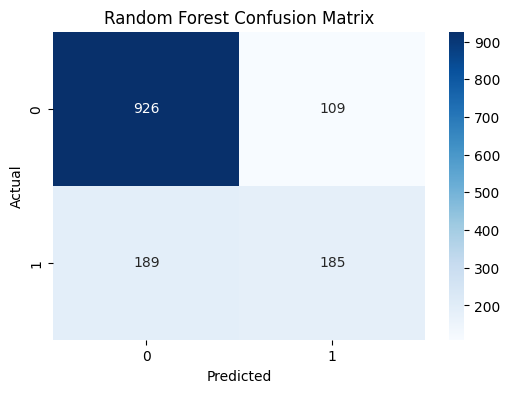

In [47]:
#Confusion Matrix (Random Forest)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


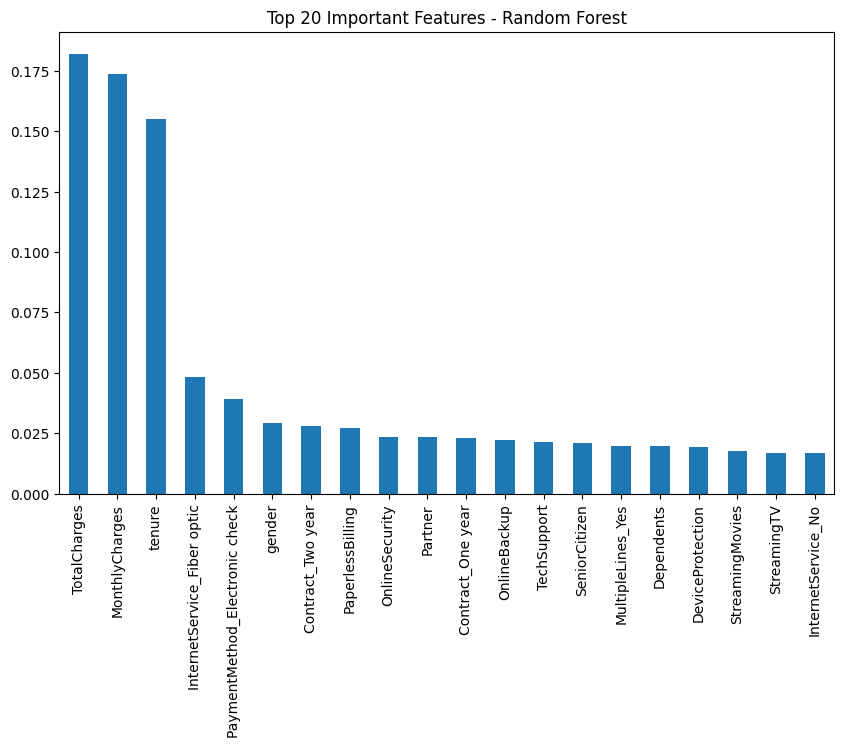

In [48]:
#Feature Importance

importance = rf.feature_importances_

# Show top 20 features
top20 = pd.Series(importance, index=X.columns).sort_values(ascending=False)[:20]

plt.figure(figsize=(10,6))
top20.plot(kind='bar')
plt.title("Top 20 Important Features - Random Forest")
plt.show()
